In [2]:
!pip install kagglehub

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset Shape: (1025, 14)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5070 - loss: 0.7104 - val_accuracy: 0.6488 - val_loss: 0.6386
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.6034 - val_accuracy: 0.7171 - val_loss: 0.5573
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.5122 - val_accuracy: 0.7415 - val_loss: 0.5056
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.4478 - val_accuracy: 0.7561 - val_loss: 0.4739
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: 0.3980 - val_accuracy: 0.7707 - val_loss: 0.4539
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3691 - val_accuracy: 0.7805 - val_loss: 0.4366
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.3471 - val_accuracy: 0.7707 - val_loss: 0.4278
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8580 - loss: 0.3230 - val_accuracy: 0.7805 - val_loss: 0.4203
Epo

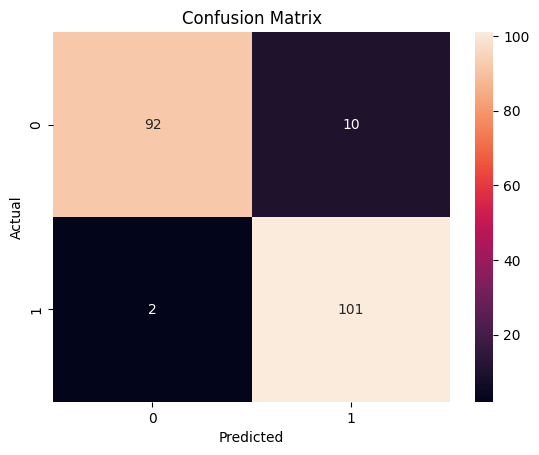


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       102
           1       0.91      0.98      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



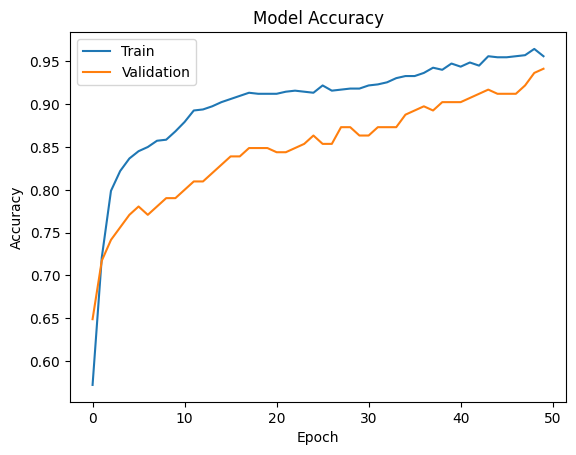

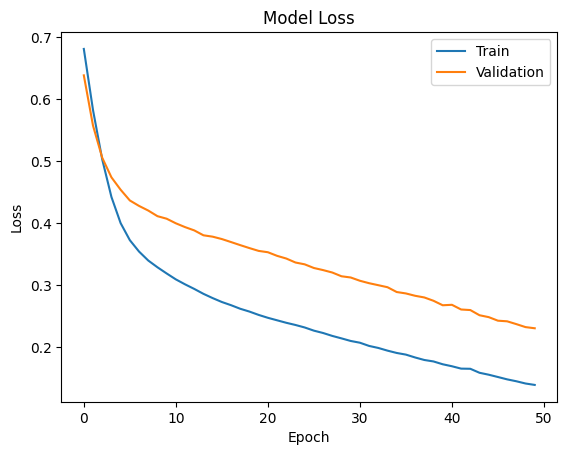

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


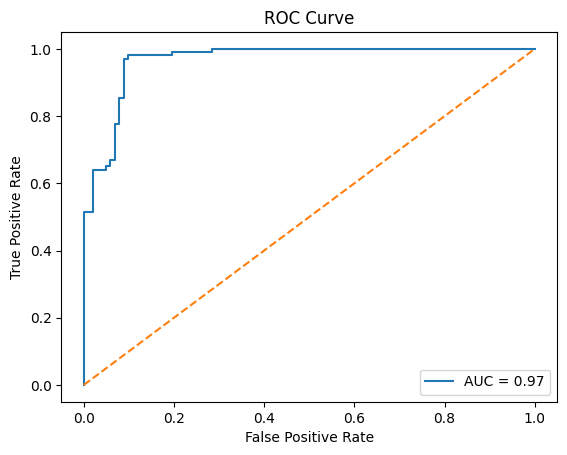

In [4]:
# ======================================
# ANN - Heart Disease (Same as Document)
# ======================================

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ======================================
# 1. Download SAME dataset (UCI Heart)
# ======================================

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

data = pd.read_csv(path + "/heart.csv")

print("Dataset Shape:", data.shape)
data.head()

# ======================================
# 2. Separate Features & Target
# ======================================

X = data.drop("target", axis=1)
y = data["target"]

# ======================================
# 3. Train-Test Split
# ======================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================================
# 4. Feature Scaling
# ======================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ======================================
# 5. Build ANN Model
# ======================================

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# ======================================
# 6. Compile Model
# ======================================

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ======================================
# 7. Train Model
# ======================================

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# ======================================
# 8. Evaluate
# ======================================

loss, accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", accuracy)

# ======================================
# 9. Confusion Matrix (WITH Numbers)
# ======================================

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ======================================
# 10. Classification Report
# ======================================

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ======================================
# 11. Accuracy & Loss Plots
# ======================================

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()

# ======================================
# 12. ROC Curve
# ======================================

from sklearn.metrics import roc_curve, auc

# Get prediction probabilities (not thresholded)
y_prob = model.predict(X_test)

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()